Vec3(0, 0.8660254037844386, 0.5000000000000001) (0.5, 0.5)
Vec3(-0.39333591926129574, 4.8169757451302756e-17, 0.9193948306461547)
(0.44853597981162063, 0.3083726369289965) (0.24113068604951646, 0.10890205972486411, <vec3.Vec3 object at 0x104ce52b0>, <vec3.Vec3 object at 0x104ce5400>)
Vec3(-0.2997756599085069, -0.8660254037844386, 0.40016815681213247)
(0.6041744709591911, 0.6137943150055765) (0.6041744709591911, 0.6137943150055765, <vec3.Vec3 object at 0x104ce54a8>)


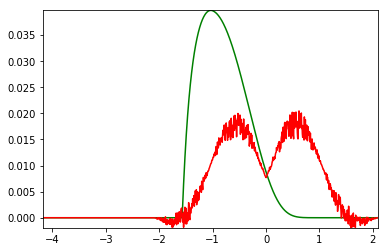

In [2]:
import brdf;
import vec3;
import math;
import random;
import matplotlib.pyplot as plt;
import microfacet;

alpha = .4



zipin= brdf.ZipinBrdf(alpha, alpha);
theta_o = math.pi /3;
wo = vec3.Vec3(0, math.sin(theta_o), math.cos(theta_o));
u = (.5, .5)
#wo = vec3.Vec3(random.uniform(0,1), random.uniform(0, 1), random.uniform(0, 1));
#u = (random.uniform(0,1), random.uniform(0, 1));
print(wo, u)
zsample =zipin.Sample(wo, u);
if zsample[0]>0:
    zeval = zipin.Eval(wo, zsample[2]);
    print(zsample[2])
    print(zeval, zsample);

beckman = brdf.Brdf(alpha, alpha);
bsample = beckman.Sample(wo, u);
if bsample[0]>0:
    beval = beckman.Eval(wo, bsample[2]);
    print(bsample[2]);
    print(beval, bsample);
    



phi_o = math.pi * 2.0 * random.uniform(0,1);
#wo = vec3.Vec3(math.sin(theta_o) * math.sin(phi_o), math.sin(theta_o)* math.cos(phi_o), math.cos(theta_o));
wo = vec3.Vec3(0, math.sin(theta_o), math.cos(theta_o));
xdata= [];              
zdata=[]; 
bdata = [];
zsamples = []
bsamples = []
sampleCount = 1000
minAngle = -theta_o - math.pi  
maxAngle = minAngle + math.pi *2.0

rangeAngle = maxAngle - minAngle
for i in range(1,sampleCount):
    thetaWi = minAngle + rangeAngle * float(i)/float(sampleCount) 
    mu = math.cos(thetaWi)
    #mu = i/sampleCount
    wi = vec3.Vec3(0, math.sin(thetaWi), mu)
    beval = beckman.Eval(wo, wi, False)
    zeval = zipin.Eval(wo, wi)
    bsamples.append(beval) 
    zsamples.append(zeval)
    xdata.append(thetaWi)
    bdata.append(beval[0] * .04)
    zdata.append(zeval[0] * .04)
    


plt.plot(xdata, bdata, color = 'green');
plt.plot(xdata, zdata, color = 'red');
plt.autoscale(True, 'both', True)
plt.show()  

